In [1]:
import numpy as np
import seaborn as sns
import tensorflow as tf
from pylab import rcParams
from cumul2norms import NPHC
from scipy.linalg import inv
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from utils.loader import load_data
# Load Cumulants object
kernel = 'exp_d10'
mode = 'nonsym_1_hard'
log10T = 10
url = 'https://s3-eu-west-1.amazonaws.com/nphc-data/{}_{}_log10T{}_with_params_without_N.pkl.gz'.format(kernel, mode, log10T)
cumul, Alpha, Beta, Gamma = load_data(url)

/Users/massil/anaconda/envs/py3k/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


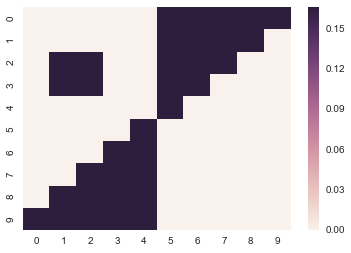

In [3]:
sns.heatmap(Alpha[::-1])

In [4]:
# Params
learning_rate = 1e1
training_epochs = 1001
display_step = 500
d = cumul.dim

In [7]:
_, s, _ = np.linalg.svd(cumul.C)
lbd_max = s[0]
#initial = tf.ones([d,d])
initial = tf.constant(inv(np.eye(d) - cumul.C / (1.1*lbd_max)).astype(np.float32), shape=[d,d])
#initial = tf.constant([[float(i+j*d)/(d**2) for i in range(d)] for j in range(d)], shape=[d,d])

R = NPHC(cumul,initial,stochastic=True,display_step=1,learning_rate=1e0)

Epoch: 0000 log10(cost)= -4.620243549
Epoch: 0001 log10(cost)= -4.630156517
Epoch: 0002 log10(cost)= -4.640591621
Epoch: 0003 log10(cost)= -4.650904655
Epoch: 0004 log10(cost)= -4.661022663
Epoch: 0005 log10(cost)= -4.670942783
Epoch: 0006 log10(cost)= -4.680671215
Epoch: 0007 log10(cost)= -4.690215111
Epoch: 0008 log10(cost)= -4.699580669
Epoch: 0009 log10(cost)= -4.708775043
Epoch: 0010 log10(cost)= -4.717803955
Epoch: 0011 log10(cost)= -4.726673126
Epoch: 0012 log10(cost)= -4.735387802
Epoch: 0013 log10(cost)= -4.743953228
Epoch: 0014 log10(cost)= -4.752374172
Epoch: 0015 log10(cost)= -4.760655880
Epoch: 0016 log10(cost)= -4.768801689
Epoch: 0017 log10(cost)= -4.776816845
Epoch: 0018 log10(cost)= -4.784704685
Epoch: 0019 log10(cost)= -4.792469978
Epoch: 0020 log10(cost)= -4.800115108


KeyboardInterrupt: 

In [208]:
list_R = []
l_r = learning_rate
_, s, _ = np.linalg.svd(cumul.C)
lbd_max = s[0]
#initial = tf.ones([d,d])
initial = tf.constant(inv(np.eye(d) - cumul.C / (1.1*lbd_max)).astype(np.float32), shape=[d,d])
#initial = tf.constant([[float(i+j*d)/(d**2) for i in range(d)] for j in range(d)], shape=[d,d])

alpha_arr = np.append(np.logspace(0,-5,6),0)

for i, alpha in enumerate(alpha_arr):
    print("alpha =", alpha)
    if i == 0: R_init = initial
    if i > 1: 
        l_r = learning_rate
        training_epochs *= 2
    R = NPHC(cumul,R_init,alpha=alpha,training_epochs=training_epochs,\
     learning_rate=l_r,display_step=display_step,optimizer='adam')
    list_R.append(R)
    R_init = R.copy()

alpha = 1.0
Epoch: 0000 log10(cost)= -7.984416485
Epoch: 0500 log10(cost)= -13.246547699
Epoch: 1000 log10(cost)= -15.422565460
Epoch: 1500 log10(cost)= -17.429998398
Epoch: 2000 log10(cost)= -18.333726883
Epoch: 2500 log10(cost)= -18.336977005
Epoch: 3000 log10(cost)= -18.337150574
Epoch: 3500 log10(cost)= -18.337234497
Epoch: 4000 log10(cost)= -18.337373734
Optimization Finished!
alpha = 0.1
Epoch: 0000 log10(cost)= -9.164191246
Epoch: 0500 log10(cost)= -10.234946251
Epoch: 1000 log10(cost)= -10.368252754
Epoch: 1500 log10(cost)= -10.431070328
Epoch: 2000 log10(cost)= -10.471733093
Epoch: 2500 log10(cost)= -10.503458977
Epoch: 3000 log10(cost)= -10.530250549
Epoch: 3500 log10(cost)= -10.553394318
Epoch: 4000 log10(cost)= -10.573338509
Optimization Finished!
alpha = 0.01
Epoch: 0000 log10(cost)= -10.576945305
Epoch: 0500 log10(cost)= -10.612645149
Epoch: 1000 log10(cost)= -10.639708519
Epoch: 1500 log10(cost)= -10.664095879
Epoch: 2000 log10(cost)= -10.686216354
Epoch: 2500 log10(cost

In [211]:
#alpha = 0.01
#R_init = initial
#R = NPHC(cumul,R_init,alpha=alpha,training_epochs=training_epochs,\
#     learning_rate=learning_rate,display_step=display_step,optimizer='adam')

/Users/massil/anaconda/envs/py3k/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


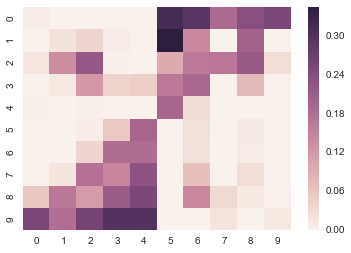

In [212]:
from scipy.linalg import inv
R = list_R[-1]
G = np.eye(R.shape[0]) - inv(R)
G[G<0]=0
sns.heatmap(G[::-1])

In [96]:
#np.logspace(0,-10,11)